In [29]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from tensorflow.keras.callbacks import Callback
from keras.models import Model
from Data import DataLoader
from DataLoader import Data
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
import pickle
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


df=Data.load_data('music.csv')

trainx,testx,trainy,testy=Data.prepare_data(df,label_dict={
    'final_blues':0,
    'final_classical':1,
    'final_country':2,
    'final_disco':3,
    'final_hiphop':4,
    'final_jazz':5,
    'final_metal':6,
    'final_pop':7,
    'final_reggae':8,
    'final_rock':9
})    

Data Loaded, Shape : 10000 ,343


In [30]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=10)

# Train the classifier on the training data
xgb_classifier.fit(trainx,trainy)

# Make predictions on the test data
y_pred = xgb_classifier.predict(testx)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(testy, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.936


In [32]:
f1_score(testy,y_pred,average='macro')

0.935314163265679

In [31]:
file_name = "XGBoost_341_features.pkl"
# save
pickle.dump(xgb_classifier, open(file_name, "wb"))

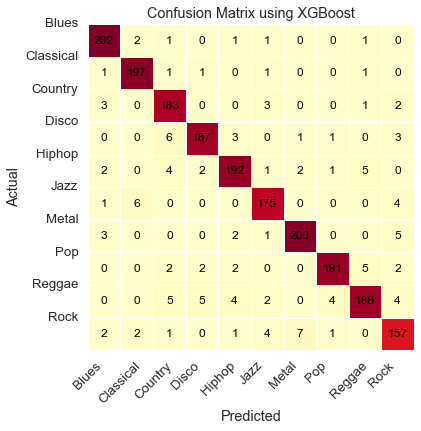

In [34]:
label_names = {
    0: 'Blues',
    1: 'Classical',
    2: 'Country',
    3: 'Disco',
    4: 'Hiphop',
    5: 'Jazz',
    6: 'Metal',
    7: 'Pop',
    8: 'Reggae',
    9: 'Rock'
}

# Calculate the confusion matrix
cm = confusion_matrix(testy, y_pred)

# Create a custom color palette with black text and white background
custom_colors = sns.color_palette("YlOrRd", as_cmap=True)

# Create a heatmap for the confusion matrix with custom colors
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', cmap=custom_colors, cbar=False,
            annot_kws={"size": 12, "color": "black"}, linewidths=0.5, square=True)

# Set x and y tick labels with the corresponding label names
plt.xticks(np.arange(len(label_names)), [label_names[i] for i in range(len(label_names))], rotation=45)
plt.yticks(np.arange(len(label_names)), [label_names[i] for i in range(len(label_names))], rotation=0)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix using XGBoost')
plt.show()

# PCA

In [35]:
pca=PCA(n_components=100)
trainx=pca.fit_transform(trainx)
testx=pca.transform(testx)
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=10)

# Train the classifier on the training data
xgb_classifier.fit(trainx,trainy)

# Make predictions on the test data
y_pred = xgb_classifier.predict(testx)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(testy, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8755


In [36]:
from sklearn.metrics import f1_score
f1_score(testy,y_pred,average='macro')

0.8739173719099241

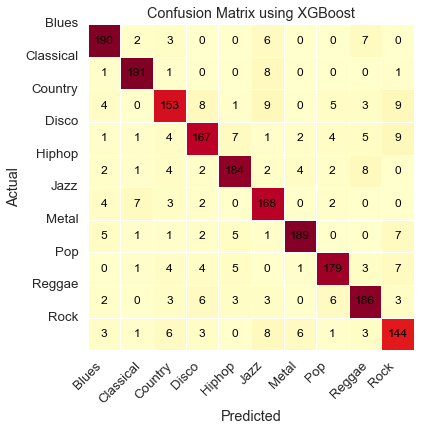

In [37]:
label_names = {
    0: 'Blues',
    1: 'Classical',
    2: 'Country',
    3: 'Disco',
    4: 'Hiphop',
    5: 'Jazz',
    6: 'Metal',
    7: 'Pop',
    8: 'Reggae',
    9: 'Rock'
}

# Calculate the confusion matrix
cm = confusion_matrix(testy, y_pred)

# Create a custom color palette with black text and white background
custom_colors = sns.color_palette("YlOrRd", as_cmap=True)

# Create a heatmap for the confusion matrix with custom colors
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', cmap=custom_colors, cbar=False,
            annot_kws={"size": 12, "color": "black"}, linewidths=0.5, square=True)

# Set x and y tick labels with the corresponding label names
plt.xticks(np.arange(len(label_names)), [label_names[i] for i in range(len(label_names))], rotation=45)
plt.yticks(np.arange(len(label_names)), [label_names[i] for i in range(len(label_names))], rotation=0)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix using XGBoost')
plt.show()

Accuracy of XGBoost Classifier:

1. With 341 features:  Accuracy: 92.3% F1 Score: 93.53
2. With 100 features:  Accuracy: 88.4% F1 Score: 92.37